## Baseball Case Study Project

### Problem statement - Develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success

Importing the impotatnt libraries for data loading, manipulation and visulization.

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Making a variable for the dataset by giving the link of the url.

In [95]:
url=('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

Loading the data

In [96]:
df=pd.read_csv(url)
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [97]:
df.shape

(30, 17)

We have 30 rows and 17 columns in the dataset.

In [98]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There is no ull value presents.

In [99]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

##### Columns description:

W- Number of wins

R- Runs

AB- At Bats

H- Hits

2B- Doubles

3B- Triples

HR- Homeruns

BB- Walks

SO- Strikeouts

SB- Stolen Bases

RA- Runs Allowed

ER- Earned Runs

ERA-Earned Run Average

CG- Complete Games

SHO-Shutouts

SV- Saves

E- Errors


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


All features are numerical with only 1 feature 'ERA' as float

In [101]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


In 2014 season:
1. Min number of wins 63 and max is 100.
2. Min number of Runs scored by a team is 573 and max is 891 with an average of 688 runs in 2014 season
3. There were min 100 home runs scored by a team and max of 232 with an average of 163 home run scored by a team.
4. Strikeouts ranges from 973 to 1518 with an average of 1248.

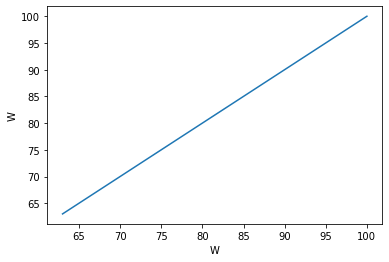

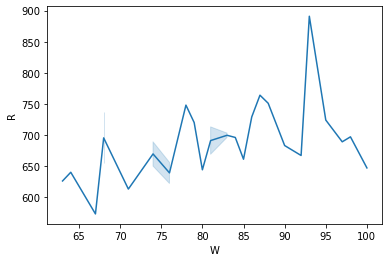

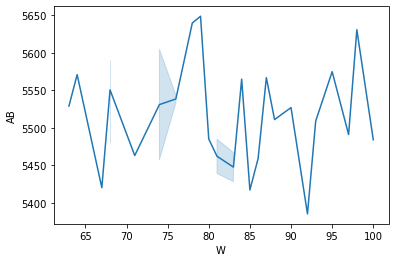

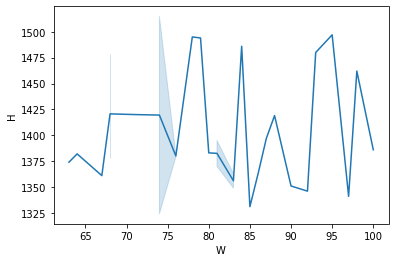

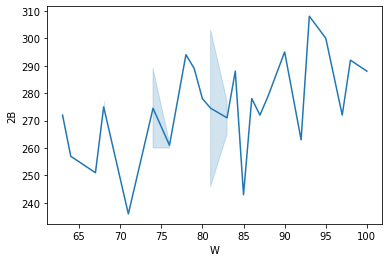

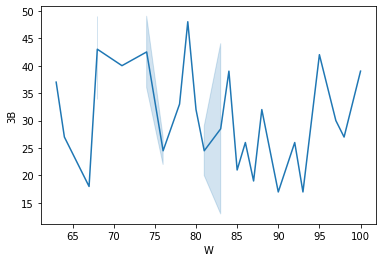

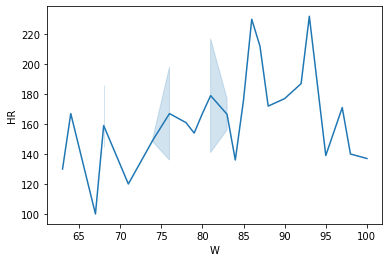

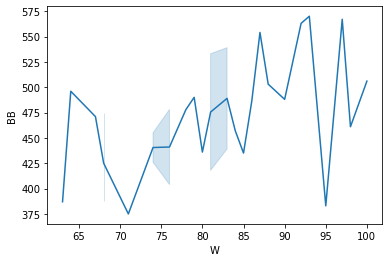

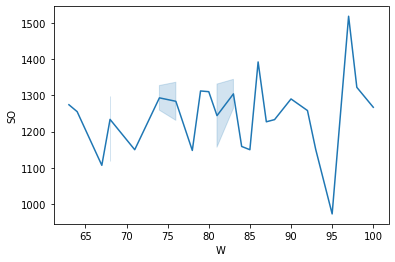

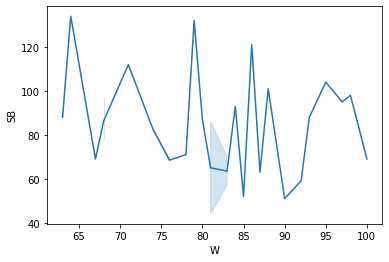

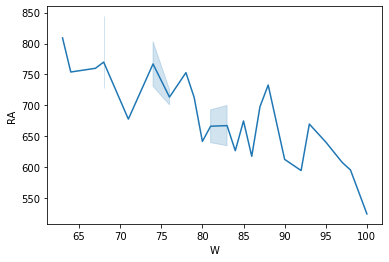

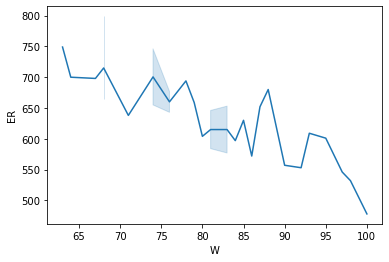

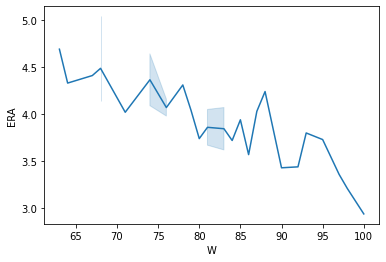

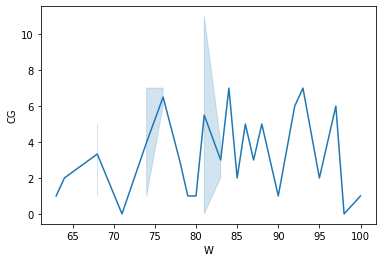

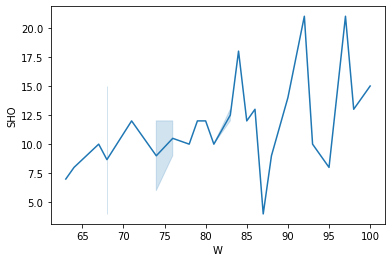

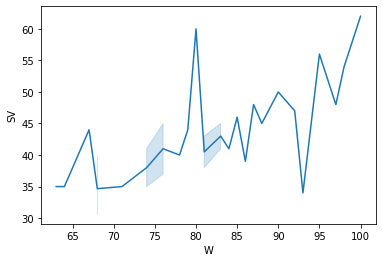

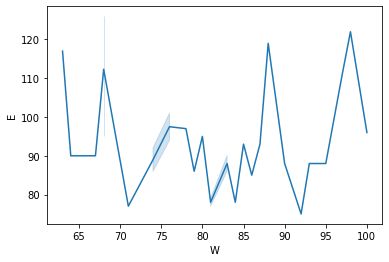

In [102]:
for i in df.columns:
    sns.lineplot(x='W',y=i,data=df)
    plt.show()

From above line polts we can conclude that number of win increases with the decrease in Runs Allowed(RA),Earned Runs(ER) and Earned Run Average (ERA).

Chances of win increases with the increae in Walks(BB), Shutouts(SHO) and Saves(SV)

Let's study this with scatter plot

<AxesSubplot:xlabel='W', ylabel='SV'>

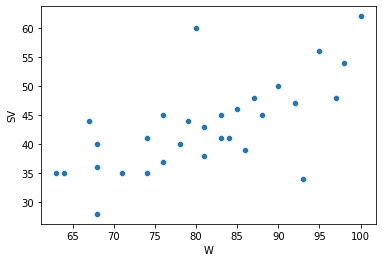

In [103]:
sns.scatterplot(x='W',y='SV',data=df)

We can see that number of Saves increases the chance of Win

<AxesSubplot:xlabel='RA', ylabel='W'>

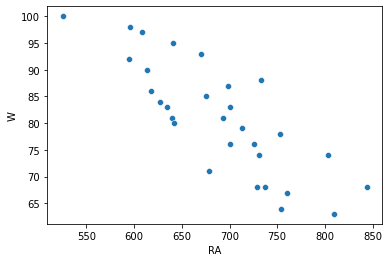

In [104]:
sns.scatterplot(x='RA',y='W',data=df)

More runs allowed will decrease the chances of winning.

<AxesSubplot:xlabel='HR', ylabel='W'>

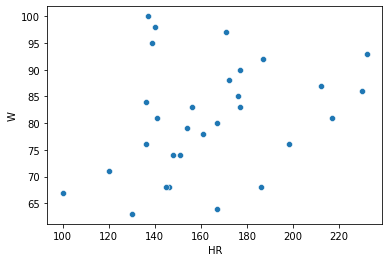

In [105]:
sns.scatterplot(x='HR',y='W',data=df)

Home Run does have minor impact in winning most number of matches

<AxesSubplot:xlabel='2B', ylabel='W'>

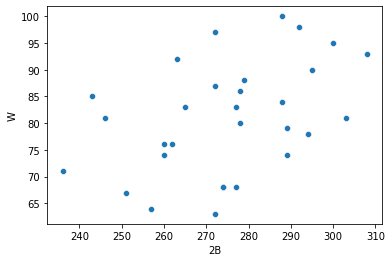

In [106]:
sns.scatterplot(x='2B',y='W',data=df)

Scoring huigh number of doubles can improve the chances of winning

<AxesSubplot:xlabel='3B', ylabel='W'>

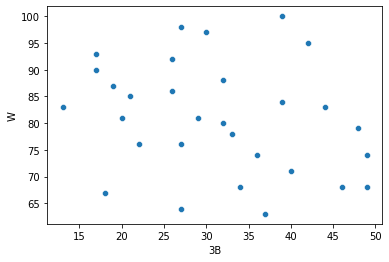

In [107]:
sns.scatterplot(x='3B',y='W',data=df)

3B has no coreralion in winning the number of matches

#### Let's check for outliers and skewness

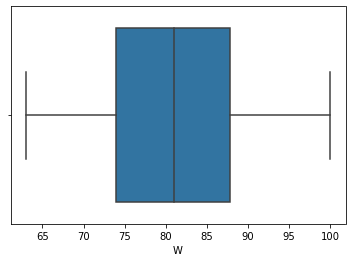

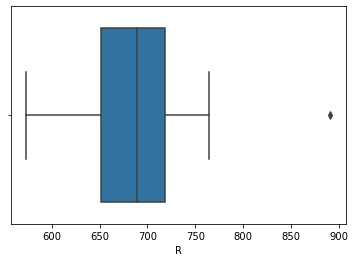

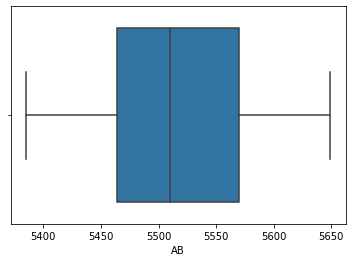

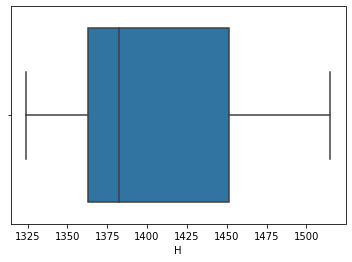

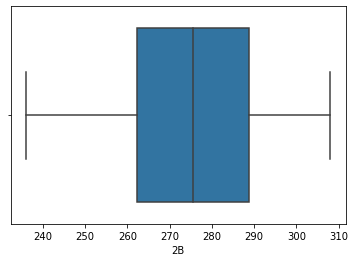

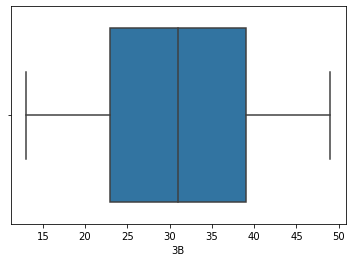

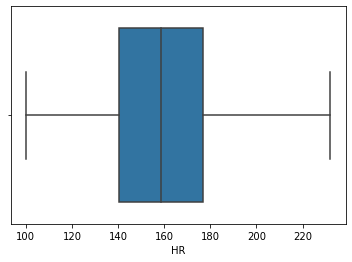

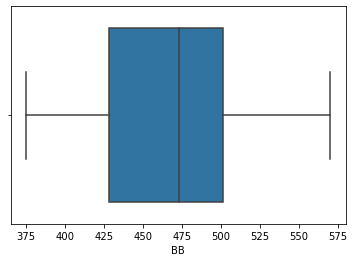

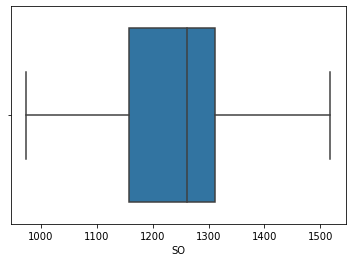

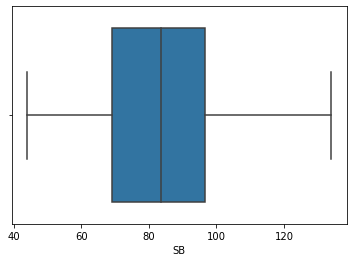

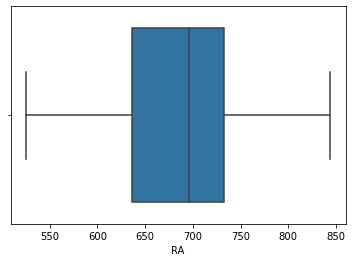

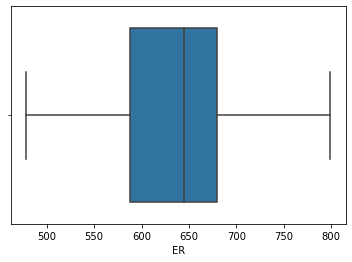

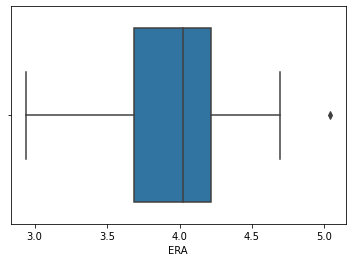

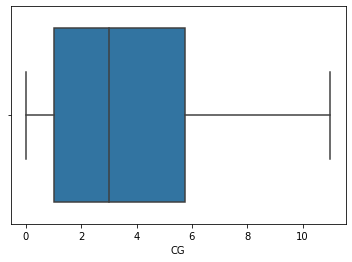

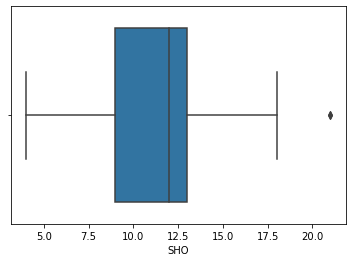

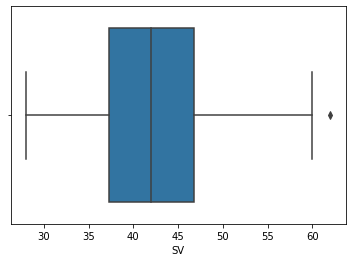

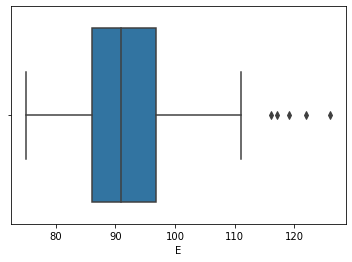

In [108]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

There are outliers in R and few outliers in E. Hence there are not much outliers present in the dataset. Since our dataset is small we will not remove them

Checking for outliers in R

In [115]:
df[df['R']>850]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


As we can see as there is only 1 team that has scored more than 891 runs

Checking for outliers in E

In [110]:
df[df['E']>120]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
14,68,694,5600,1405,277,46,146,475,1119,78,729,664,4.14,5,15,28,126
16,98,697,5631,1462,292,27,140,461,1322,98,596,532,3.21,0,13,54,122


Here also hardly any data above 120 so we will keep the outliers

Checking the skewness

In [111]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

We will use th log transform method to remove the skewness.

In [112]:
for i in df.columns:
    if df[i].skew()>0.50:
        df[i]=np.log1p(df[i])

In [113]:
df.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR    -0.009528
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

We are able to reduce the skewness in most of the features. Using other skew method were returning Null values

In [116]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,6.586172,5575,7.311886,300,42,4.941642,383,973,104,641,601,3.73,1.098612,2.197225,4.043051,4.488636
1,83,6.546785,5467,7.207860,277,44,5.056246,439,1264,70,700,653,4.07,1.098612,2.564949,3.828641,4.465908
2,81,6.507278,5439,7.241366,303,29,4.955827,533,1157,86,640,584,3.67,2.484907,2.397895,3.663562,4.382027
3,76,6.434547,5533,7.231287,260,27,4.919981,404,1231,68,701,643,3.98,2.079442,2.302585,3.637586,4.624973
4,74,6.536692,5605,7.323831,289,49,5.023881,455,1259,83,803,746,4.64,2.079442,2.564949,3.583519,4.465908
5,93,6.793466,5509,7.300473,308,17,5.451038,570,1151,88,670,609,3.80,2.079442,2.397895,3.555348,4.488636
6,87,6.639876,5567,7.242798,272,19,5.361292,554,1227,63,698,652,4.03,1.386294,1.609438,3.891820,4.543295
7,81,6.570883,5485,7.223296,246,20,5.384495,418,1331,44,693,646,4.05,0.000000,2.397895,3.784190,4.356709
8,80,6.469250,5485,7.232733,278,32,5.123964,436,1310,87,642,604,3.74,0.693147,2.564949,4.110874,4.564348
9,78,6.618739,5640,7.310550,294,33,5.087596,478,1148,71,753,694,4.31,1.386294,2.397895,3.713572,4.584967


### Model Fitting

Let's split the data into input and target variable

In [117]:
x=df.drop(['W'],axis=1)
y=df['W']
y=pd.DataFrame(data=y)

Before fitting our model, first we will bring the data to common scale using Standard Scaler

In [119]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
sc_x=pd.DataFrame(sc_x,columns=x.columns)

In [120]:
sc_x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.665329,0.847731,1.649382,1.420173,1.041193,-0.763978,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.278921,-0.729108,1.581273,-0.427060
1,0.179562,-0.711094,-0.981656,0.127403,1.235809,-0.157077,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.278921,0.322638,0.336185,-0.591693
2,-0.307704,-1.115233,-0.134210,1.588795,-0.223808,-0.688861,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,1.762778,-0.155160,-0.622441,-1.199289
3,-1.204730,0.241522,-0.389136,-0.828122,-0.418423,-0.878690,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.165619,-0.427761,-0.773282,0.560495
4,0.055070,1.280738,1.951480,0.801892,1.722347,-0.328473,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.165619,0.322638,-1.087253,-0.591693
5,3.221983,-0.104884,1.360715,1.869832,-1.391501,1.933613,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.165619,-0.155160,-1.250843,-0.427060
6,1.327687,0.732263,-0.098001,-0.153633,-1.196885,1.458347,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,0.144769,-2.410262,0.703068,-0.031141
7,0.476767,-0.451289,-0.591253,-1.615025,-1.099578,1.581221,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.896930,-0.155160,0.078051,-1.382679
8,-0.776713,-0.451289,-0.352560,0.183611,0.068115,0.201536,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-0.876080,0.322638,1.975123,0.121359
9,1.066997,1.785913,1.615591,1.082929,0.165423,0.008945,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,0.144769,-0.155160,-0.332028,0.270716


Our data is now on common scale. I am reassigning x to the sc_x.

In [121]:
x=sc_x
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.665329,0.847731,1.649382,1.420173,1.041193,-0.763978,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.278921,-0.729108,1.581273,-0.427060
1,0.179562,-0.711094,-0.981656,0.127403,1.235809,-0.157077,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.278921,0.322638,0.336185,-0.591693
2,-0.307704,-1.115233,-0.134210,1.588795,-0.223808,-0.688861,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,1.762778,-0.155160,-0.622441,-1.199289
3,-1.204730,0.241522,-0.389136,-0.828122,-0.418423,-0.878690,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.165619,-0.427761,-0.773282,0.560495
4,0.055070,1.280738,1.951480,0.801892,1.722347,-0.328473,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.165619,0.322638,-1.087253,-0.591693
5,3.221983,-0.104884,1.360715,1.869832,-1.391501,1.933613,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.165619,-0.155160,-1.250843,-0.427060
6,1.327687,0.732263,-0.098001,-0.153633,-1.196885,1.458347,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,0.144769,-2.410262,0.703068,-0.031141
7,0.476767,-0.451289,-0.591253,-1.615025,-1.099578,1.581221,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.896930,-0.155160,0.078051,-1.382679
8,-0.776713,-0.451289,-0.352560,0.183611,0.068115,0.201536,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-0.876080,0.322638,1.975123,0.121359
9,1.066997,1.785913,1.615591,1.082929,0.165423,0.008945,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,0.144769,-0.155160,-0.332028,0.270716


Let's import the necessary Regression libraries for model fitting.

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

We will use Linear regression model to check for the best random state to fit our training and test data

In [123]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is: 0.9679448816086823
At random state 0,the testing accuracy is: -0.04970224427321268


At random state 1,the training accuracy is: 0.9675887780905523
At random state 1,the testing accuracy is: 0.7638525513628714


At random state 2,the training accuracy is: 0.9878077044194704
At random state 2,the testing accuracy is: -1.6709380618954723


At random state 3,the training accuracy is: 0.9618549437307777
At random state 3,the testing accuracy is: 0.5857359016713908


At random state 4,the training accuracy is: 0.9671574119519999
At random state 4,the testing accuracy is: 0.5937383632226543


At random state 5,the training accuracy is: 0.9493963547470088
At random state 5,the testing accuracy is: 0.8851590912293609


At random state 6,the training accuracy is: 0.9586627943801213
At random state 6,the testing accuracy is: 0.7651451623519192


At random state 7,the training accuracy is: 0.9633805510461998
At random state 7,the testing accuracy is: -0

At random state 71,the training accuracy is: 0.9728799000403824
At random state 71,the testing accuracy is: -0.5591972747302942


At random state 72,the training accuracy is: 0.9637985836648735
At random state 72,the testing accuracy is: 0.702205482465035


At random state 73,the training accuracy is: 0.9689146217097169
At random state 73,the testing accuracy is: 0.709882052032452


At random state 74,the training accuracy is: 0.9809540976647356
At random state 74,the testing accuracy is: -0.6098373851081682


At random state 75,the training accuracy is: 0.9580162032438846
At random state 75,the testing accuracy is: 0.5822996688084852


At random state 76,the training accuracy is: 0.9786991626719804
At random state 76,the testing accuracy is: -0.31939031680500785


At random state 77,the training accuracy is: 0.983265854176815
At random state 77,the testing accuracy is: -0.26175437282331626


At random state 78,the training accuracy is: 0.9674664375104564
At random state 78,the testing

We will now split the data with the random_state 39 as that has given us the best accuracy on training and test data.

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=39)

#### Fitting the data to SupportVectorRegression model

In [125]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.8962933961064968
0.4813617606259595
0.25090856293346386


Kernel 'linear' has given us the best output, hence we will select 'rbf' for testing the mod

#### Fitting the data to various model and checking the accuracy

In [129]:
sv=SVR(kernel='linear')
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
ab=AdaBoostRegressor()
ls=Lasso()
rd=Ridge()

model=[lr,sv,dt,rf,kn,ab,ls,rd]
kf = KFold(n_splits=5, random_state=54, shuffle=True)

train=[]
test=[]
Mse=[]
cv=[]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score)
    mse = mean_squared_error(y_test,pred_test)
    Mse.append(mse)
    score=cross_val_score(m,x,y,cv=kf)
    cv.append(score.mean())
    
Performance={'Model':['Linear Regression','SupportVector','DecisionTree','RandomForest','KNN','AdaBoost','Lasso','Ridge'],
             'Training Score':train,
            'Test Score':test,
            'Mean Square Error':Mse,
            'Cross Validation Score': cv}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Training Score,Test Score,Mean Square Error,Cross Validation Score
0,Linear Regression,0.951157,0.926881,8.067459,0.302692
1,SupportVector,0.896293,0.845364,17.061464,0.497753
2,DecisionTree,1.000000,0.438066,62.000000,-0.473356
3,RandomForest,0.947984,0.428435,63.062683,0.193072
4,KNN,0.667355,0.395831,66.660000,0.377956
5,AdaBoost,0.992918,0.595539,44.625517,0.199518
6,Lasso,0.878584,0.807420,21.247940,0.670743
7,Ridge,0.934004,0.903783,10.615963,0.515796


##### From the above table we can say that Lasso is best that fits the model. It has accuracy score of 80% and CV score of 67%. It has shown the minimum difference.

#### HyperTuning Lasso

For hypertuning we will usee GridSearchCV

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


Lets fit the above parameters to the Lasso

In [137]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
scores=cross_val_score(ls,x,y,cv=kf)
MSE = mean_squared_error(y_test,pred_ls)
print('Lasso Performance')
print('---------------------------------------------------')
print('Accuracy Score', lss)
print('Cross Validation score',scores.mean())
print('Mean Square Error',mse)

Lasso Performance
---------------------------------------------------
Accuracy Score 0.8074204840529902
Cross Validation score 0.6707429491489164
Mean Square Error 10.615963407213586


There is no major improvement but we will choose this as our final model

#### Lets Visualize our model

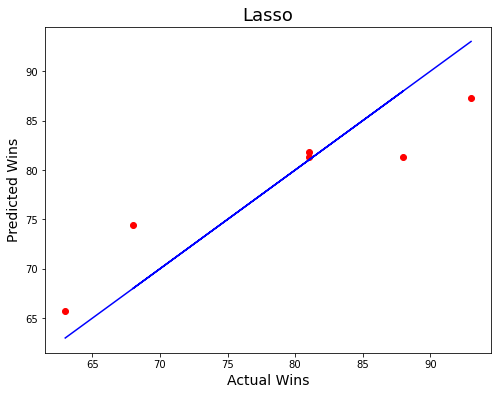

In [139]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=14)
plt.ylabel('Predicted Wins',fontsize=14)
plt.title('Lasso',fontsize=18)
plt.show()

The model is performing iwth 80% accuracy. Hence we can say that we can predict 80% of the win with the above model

Lets create our object file for the final model

In [140]:
import joblib
joblib.dump(ls,'Baseball_win.obj')

['Baseball_win.obj']

#### Completed